<a href="https://colab.research.google.com/github/intelligent-environments-lab/CityLearn/blob/master/examples/quickstart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



Install the latest CityLearn version from PyPi with the :code:`pip` command:

In [ ]:
pip install CityLearn==2.0b3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 95.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 61.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 16.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 1.3.5 which is incompatible.
plotnine 0.12.2 requires pandas>=1.5.0, but you have pandas 1.3.5 which is incompa

## Centralized RBC
Run the following to simulate an environment controlled by centralized RBC agent for a single episode:

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


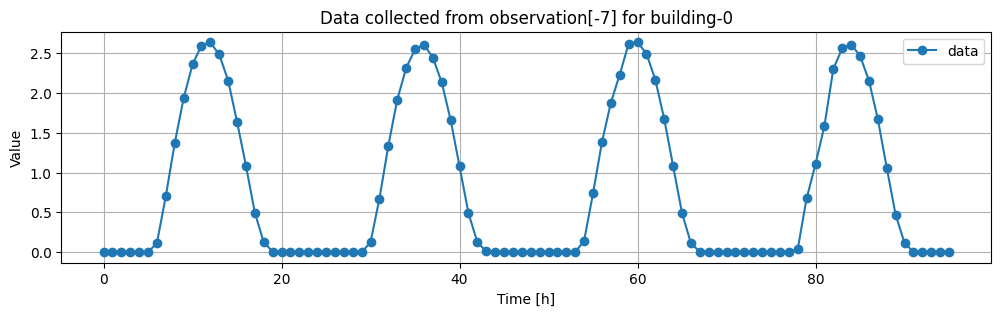

name,Building_1,Building_2,Building_3,Building_4,Building_5,District
cost_function,,,,,,
annual_peak_average,NaN,NaN,NaN,NaN,NaN,1.144830
carbon_emissions_total,1.350855,1.0,1.0,1.0,1.0,1.070171
cost_total,1.250129,1.0,1.0,1.0,1.0,1.050026
daily_peak_average,NaN,NaN,NaN,NaN,NaN,1.156367
discomfort_delta_average,0.000000,0.0,0.0,0.0,0.0,0.000000
discomfort_delta_maximum,0.000000,0.0,0.0,0.0,0.0,0.000000
discomfort_delta_minimum,0.000000,0.0,0.0,0.0,0.0,0.000000
electricity_consumption_total,1.374162,1.0,1.0,1.0,1.0,1.074832
one_minus_load_factor_average,NaN,NaN,NaN,NaN,NaN,1.014489


In [ ]:
from citylearn.citylearn import CityLearnEnv
from citylearn.agents.rbc import BasicRBC as RBCAgent
import random
import matplotlib.pyplot as plt

dataset_name = 'citylearn_challenge_2022_phase_1'
env = CityLearnEnv(dataset_name, central_agent=True, simulation_end_time_step=1000)
model = RBCAgent(env)
model.learn(episodes=1)

# resent the environment
joint_observation = env.reset()

n_steps = 96      # setting up the number of steps (hours in the simulation, i.e. 24 is a whole single day)
obs_idx = -7      # the index of the observation variable to plot (-6 => "electrical_storage_soc"
                  #                                                -7 => "solar_generation"...)
building_i = 0    # index of the building for which to plot the data

data_to_plot = []
n_buildings = len(joint_observation)  # number of buildings in the environment

# add the initial observation to the data
data_to_plot.append(joint_observation[building_i][obs_idx])


# run through the environment manually
for _ in range(n_steps - 1):
  # sample random actions for all buildings
  joint_action = [[random.uniform(-1, 1)] for _ in range(n_buildings)]

  # step the environmnet
  next_joint_observation, reward, info, done = env.step(joint_action)

  # collect the data
  data_to_plot.append(next_joint_observation[building_i][obs_idx])
# plotting the data collected
fig, ax = plt.subplots(1, 1, figsize=(12, 3))
ax.set_title(f"Data collected from observation[{obs_idx}] for building-{building_i}")
ax.plot(range(n_steps), data_to_plot, '-o', label='data')
ax.set_xlabel("Time [h]")
ax.set_ylabel("Value")
ax.grid()
ax.legend()
plt.show()

# print cost functions at the end of episode
kpis = model.env.evaluate().pivot(index='cost_function', columns='name', values='value')
kpis = kpis.dropna(how='all')
display(kpis)

## Decentralized-Independent SAC

Run the following to simulate an environment controlled by decentralized-independent SAC agents for 1 training episode:

In [ ]:
from citylearn.citylearn import CityLearnEnv
from citylearn.agents.sac import SAC as RLAgent

dataset_name = 'citylearn_challenge_2022_phase_1'
env = CityLearnEnv(dataset_name, central_agent=False, simulation_end_time_step=1000)
model = RLAgent(env)
model.learn(episodes=2, deterministic_finish=True)

# print cost functions at the end of episode
kpis = model.env.evaluate().pivot(index='cost_function', columns='name', values='value')
kpis = kpis.dropna(how='all')
display(kpis)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


name,Building_1,Building_2,Building_3,Building_4,Building_5,District
cost_function,,,,,,
annual_peak_average,NaN,NaN,NaN,NaN,NaN,1.001767
carbon_emissions_total,1.002988,1.0,1.006116,1.009829,1.0,1.003787
cost_total,1.004442,1.0,1.005384,1.008708,1.0,1.003707
daily_peak_average,NaN,NaN,NaN,NaN,NaN,1.002025
discomfort_delta_average,0.000000,0.0,0.000000,0.000000,0.0,0.000000
discomfort_delta_maximum,0.000000,0.0,0.000000,0.000000,0.0,0.000000
discomfort_delta_minimum,0.000000,0.0,0.000000,0.000000,0.0,0.000000
electricity_consumption_total,1.001423,1.0,1.005565,1.008827,1.0,1.003163
one_minus_load_factor_average,NaN,NaN,NaN,NaN,NaN,0.998669


## Decentralized-Cooperative MARLISA

Run the following to simulate an environment controlled by decentralized-cooperative MARLISA agents for 1 training episode:

In [ ]:
from citylearn.citylearn import CityLearnEnv
from citylearn.agents.marlisa import MARLISA as RLAgent

dataset_name = 'citylearn_challenge_2022_phase_1'
env = CityLearnEnv(dataset_name, central_agent=False, simulation_end_time_step=1000)
model = RLAgent(env)
model.learn(episodes=2, deterministic_finish=True)

kpis = model.env.evaluate().pivot(index='cost_function', columns='name', values='value')
kpis = kpis.dropna(how='all')
display(kpis)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


name,Building_1,Building_2,Building_3,Building_4,Building_5,District
cost_function,,,,,,
annual_peak_average,NaN,NaN,NaN,NaN,NaN,1.000772
carbon_emissions_total,0.999983,1.000724,1.000447,1.008094,1.0,1.001850
cost_total,0.999980,1.000810,1.000864,1.007195,1.0,1.001770
daily_peak_average,NaN,NaN,NaN,NaN,NaN,1.000925
discomfort_delta_average,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
discomfort_delta_maximum,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
discomfort_delta_minimum,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
electricity_consumption_total,0.999981,1.000574,1.000139,1.007001,1.0,1.001539
one_minus_load_factor_average,NaN,NaN,NaN,NaN,NaN,0.999501


## Stable Baselines3 Reinforcement Learning Algorithms

Install the latest version of Stable Baselines3:

In [ ]:
!apt-get update && apt-get install ffmpeg freeglut3-dev xvfb  # For visualization
!pip install "stable-baselines3[extra]>=2.0.0a4"

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:6 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease [18.1 kB]
Get:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [109 kB]
Get:8 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [979 kB]
Get:9 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [1,102 kB]
Hit:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:11 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [857 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,236 kB]
Get:13 http://security.ub

Before the environment is ready for use in Stable Baselines3, it needs to be wrapped. Firstly, wrap the environment using the `NormalizedObservationWrapper` (see [docs](https://www.citylearn.net/api/citylearn.wrappers.html#citylearn.wrappers.NormalizedObservationWrapper)) to ensure that observations served to the agent are min-max normalized between [0, 1] and cyclical observations e.g. hour, are encoded using the cosine transformation.

Next, we wrap with the `StableBaselines3Wrapper` (see [docs](https://www.citylearn.net/api/citylearn.wrappers.html#citylearn.wrappers.StableBaselines3Wrapper)) that ensures observations, actions and rewards are served in manner that is compatible with Stable Baselines3 interface.

For the following Stable Baselines3 example, the `baeda_3dem` dataset that support building temperature dynamics is used.

> ⚠️ **NOTE**: `central_agent` in the `env` must be `True` when using Stable Baselines3  as it does not support multi-agents.

##SAC algorithm

In [ ]:
from stable_baselines3.sac import SAC
from citylearn.citylearn import CityLearnEnv
from citylearn.wrappers import NormalizedObservationWrapper, StableBaselines3Wrapper

dataset_name = 'baeda_3dem'
env = CityLearnEnv(dataset_name, central_agent=True, simulation_end_time_step=1000)
env = NormalizedObservationWrapper(env)
env = StableBaselines3Wrapper(env)
model = SAC('MlpPolicy', env)
model.learn(total_timesteps=env.time_steps*2)


observations = env.reset()
print(len(observations))

while not env.done:
    actions, _ = model.predict(observations, deterministic=True)
    observations, _, _, _ = env.step(actions)

kpis = env.evaluate().pivot(index='cost_function', columns='name', values='value')
kpis = kpis.dropna(how='all')
display(kpis)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


51


name,Building_1,Building_2,Building_3,Building_4,District
cost_function,,,,,
annual_peak_average,NaN,NaN,NaN,NaN,0.782930
cost_total,1.423100,0.716208,0.748008,1.053915,0.985308
daily_peak_average,NaN,NaN,NaN,NaN,0.828131
discomfort_delta_average,-1.126886,0.646735,3.906914,-0.919852,0.626728
discomfort_delta_maximum,0.336281,2.564220,6.864529,1.866291,2.907830
discomfort_delta_minimum,-6.215225,-2.630093,-3.700124,-4.361576,-4.226754
discomfort_proportion,0.615686,0.363958,0.876979,0.328012,0.546159
discomfort_too_cold_proportion,0.615686,0.010601,0.003654,0.328012,0.239488
discomfort_too_hot_proportion,0.000000,0.353357,0.873325,0.000000,0.306671


51


##PPO

In [ ]:
from stable_baselines3.ppo import PPO
from citylearn.citylearn import CityLearnEnv
from citylearn.wrappers import NormalizedObservationWrapper, StableBaselines3Wrapper

dataset_name = 'baeda_3dem'
env = CityLearnEnv(dataset_name, central_agent=True, simulation_end_time_step=1000)
env = NormalizedObservationWrapper(env)
env = StableBaselines3Wrapper(env)
model = PPO('MlpPolicy', env)
model.learn(total_timesteps=env.time_steps*2)

# evaluate
observations = env.reset()

while not env.done:
    actions, _ = model.predict(observations, deterministic=True)
    observations, _, _, _ = env.step(actions)

kpis = env.evaluate().pivot(index='cost_function', columns='name', values='value')
kpis = kpis.dropna(how='all')
display(kpis)

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


name,Building_1,Building_2,Building_3,Building_4,District
cost_function,,,,,
annual_peak_average,NaN,NaN,NaN,NaN,0.477774
cost_total,0.520343,0.525587,0.739190,0.434291,0.554853
daily_peak_average,NaN,NaN,NaN,NaN,0.507249
discomfort_delta_average,0.135563,0.945338,3.927915,3.786386,2.198800
discomfort_delta_maximum,3.040653,2.727217,6.877220,8.727219,5.343077
discomfort_delta_minimum,-4.218332,-2.555969,-3.700124,-2.782747,-3.314293
discomfort_proportion,0.523529,0.577739,0.876979,0.856313,0.708640
discomfort_too_cold_proportion,0.243137,0.005300,0.003654,0.004354,0.064111
discomfort_too_hot_proportion,0.280392,0.572438,0.873325,0.851959,0.644529


##DDPG

In [ ]:
from stable_baselines3.ddpg import DDPG

from citylearn.wrappers import NormalizedObservationWrapper, StableBaselines3Wrapper

dataset_name = 'baeda_3dem'
env = CityLearnEnv(dataset_name, central_agent=True, simulation_end_time_step=1000)
env = NormalizedObservationWrapper(env)
env = StableBaselines3Wrapper(env)
model = DDPG('MlpPolicy', env)
model.learn(total_timesteps=env.time_steps*2)

# evaluate
observations = env.reset()

while not env.done:
    actions, _ = model.predict(observations, deterministic=True)
    observations, _, _, _ = env.step(actions)

kpis = env.evaluate().pivot(index='cost_function', columns='name', values='value')
kpis = kpis.dropna(how='all')
display(kpis)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


name,Building_1,Building_2,Building_3,Building_4,District
cost_function,,,,,
annual_peak_average,NaN,NaN,NaN,NaN,0.512854
cost_total,0.948696,0.796670,0.742030,0.401814,0.722303
daily_peak_average,NaN,NaN,NaN,NaN,0.574268
discomfort_delta_average,-0.407985,0.370261,3.927908,3.988461,1.969661
discomfort_delta_maximum,2.348610,2.759224,6.877216,8.880501,5.216388
discomfort_delta_minimum,-4.759701,-3.589638,-3.700124,-2.782747,-3.708052
discomfort_proportion,0.176471,0.365724,0.876979,0.867925,0.571775
discomfort_too_cold_proportion,0.166667,0.065371,0.003654,0.004354,0.060011
discomfort_too_hot_proportion,0.009804,0.300353,0.873325,0.863570,0.511763
